In [36]:
# 1. Основные библиотеки
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2. Разделение датасета
from sklearn.model_selection import train_test_split

# 3. Модели
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# 4. Метрики качества
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

import warnings
warnings.filterwarnings('ignore')

In [37]:
DATASET_PATH = '../content/adm_data.csv'

### 1. Первичный анализ данных

In [38]:
df = pd.read_csv(DATASET_PATH, sep=',')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [40]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


Датасет имеет 400 наблюдений, пропусков нет. Всего 9 признаков, все числовые. Целевой признак - `Chance of Admit`

### 2. Визуальный анализ данных

In [41]:
# избавимся от неинформативного признака

df.drop('Serial No.', axis=1, inplace=True)

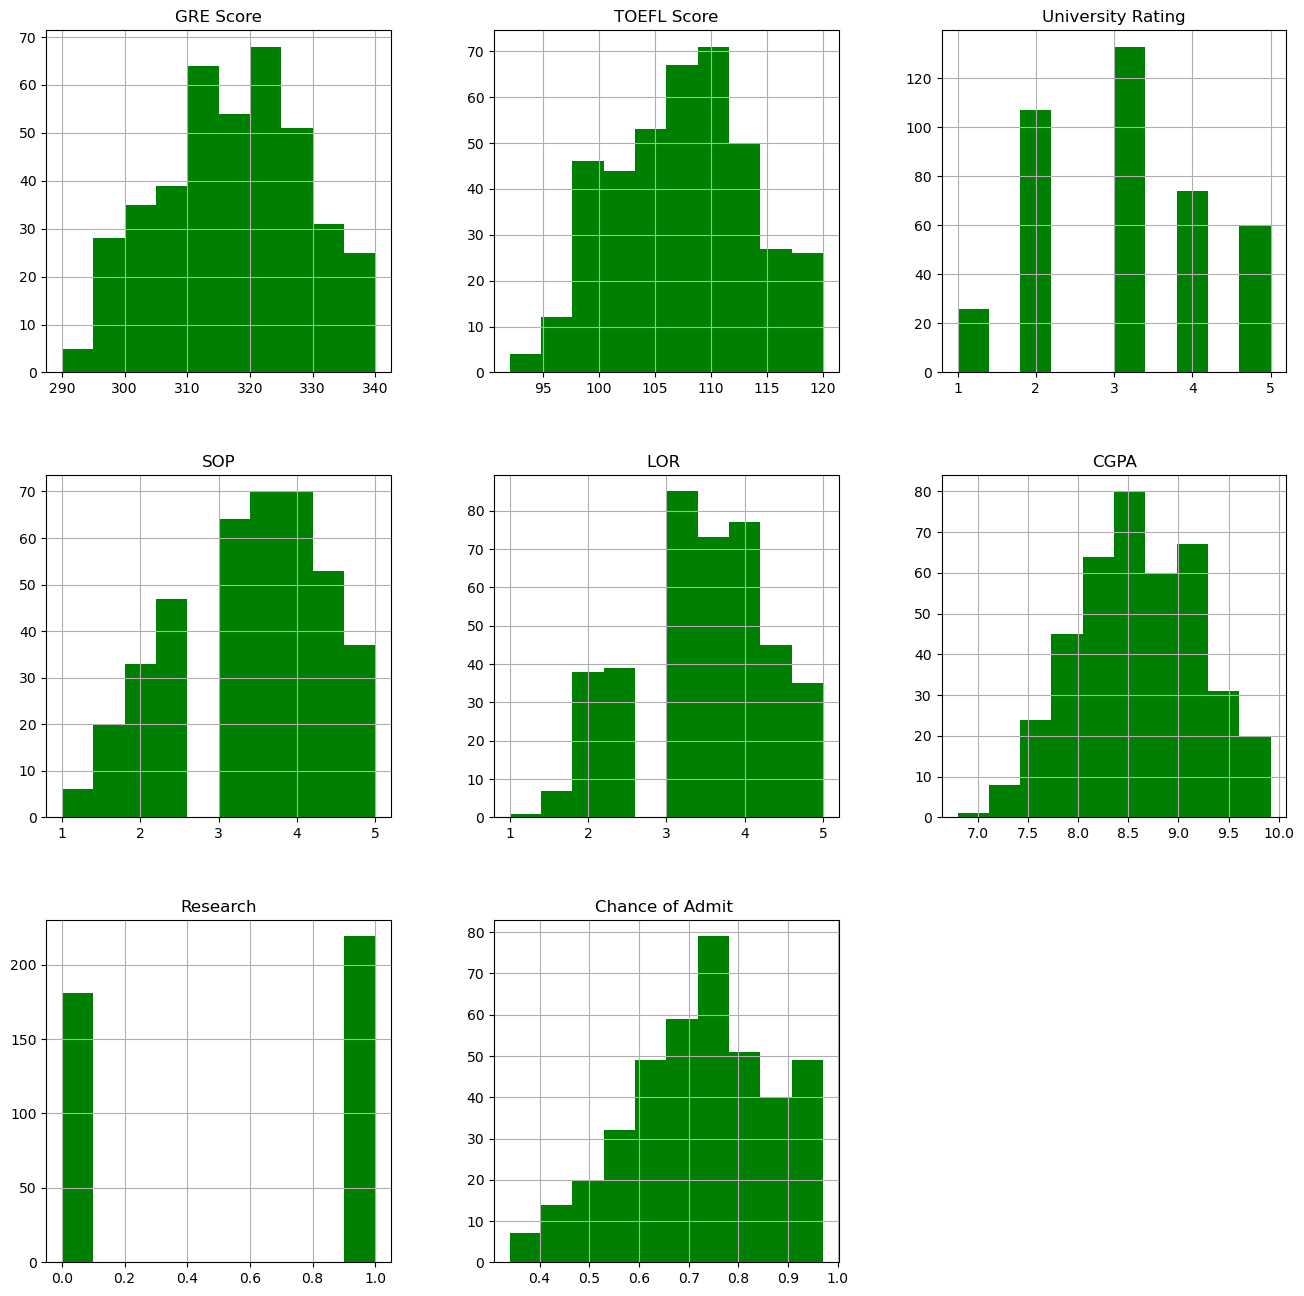

In [42]:
df.hist(figsize=(16, 16), color='g');

Выбросов не наблюдается. Посмотрим на целевой признак:

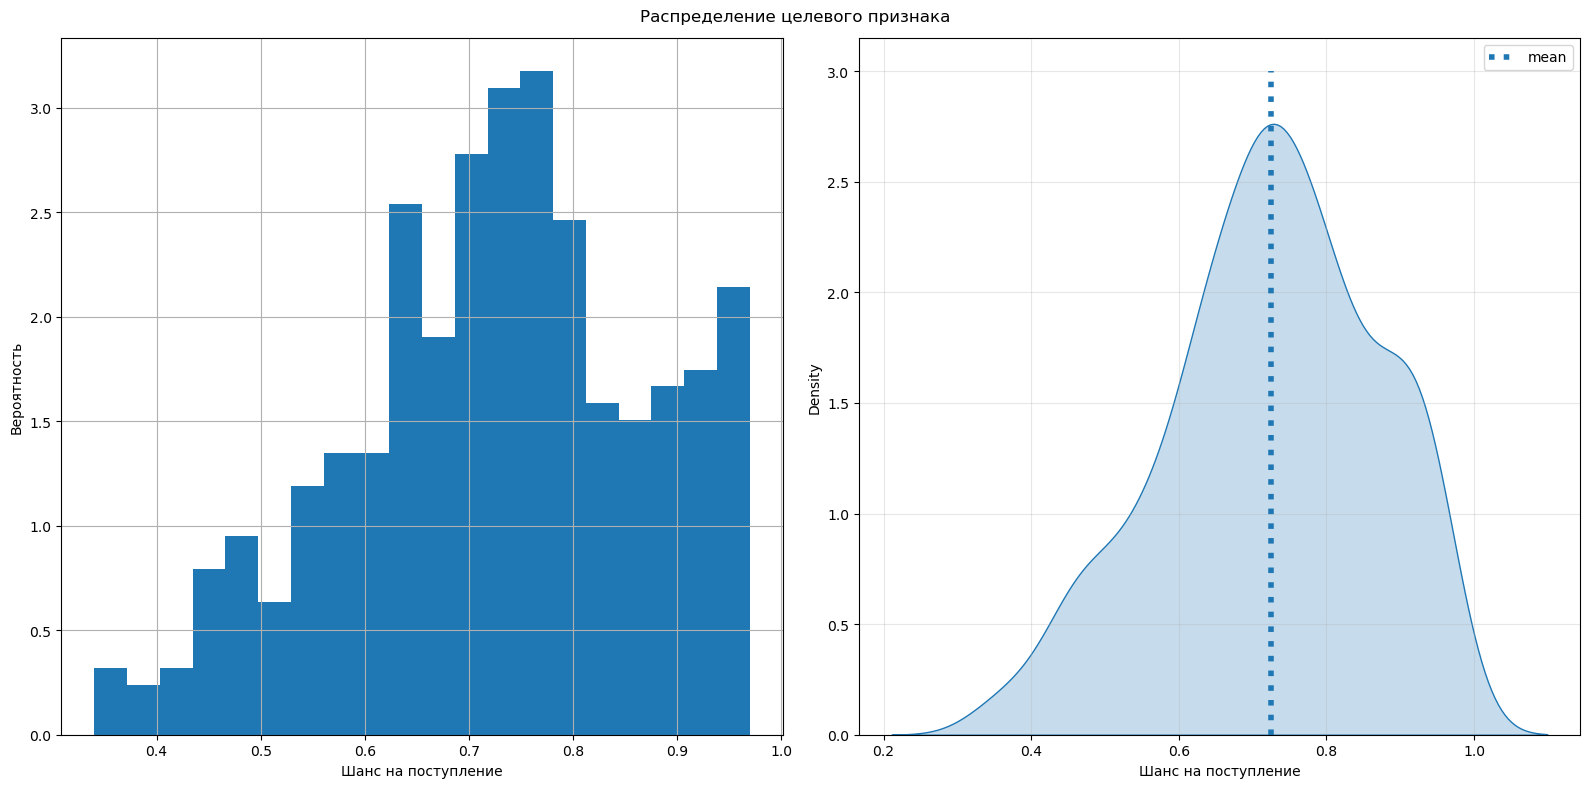

In [59]:
plt.figure(figsize=(16, 8))

plt.subplot(121)
df['Chance of Admit '].hist(density=True, bins=20)
plt.ylabel('Вероятность')
plt.xlabel('Шанс на поступление')

plt.subplot(122)
sns.kdeplot(df['Chance of Admit '], legend=False, shade=True)
y = np.linspace(0, 3., 2)
plt.plot([df['Chance of Admit '].mean()] * 2
         , y
         , label='mean'
         , linestyle=':'
         , linewidth=4
         )
plt.grid(alpha=.3)
plt.legend(loc='best')
plt.xlabel('Шанс на поступление')
plt.suptitle('Распределение целевого признака')
plt.tight_layout();

Посмотрим на матрицу корреляций:

In [60]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

Text(0.5, 1.0, 'Матрица корреляций')

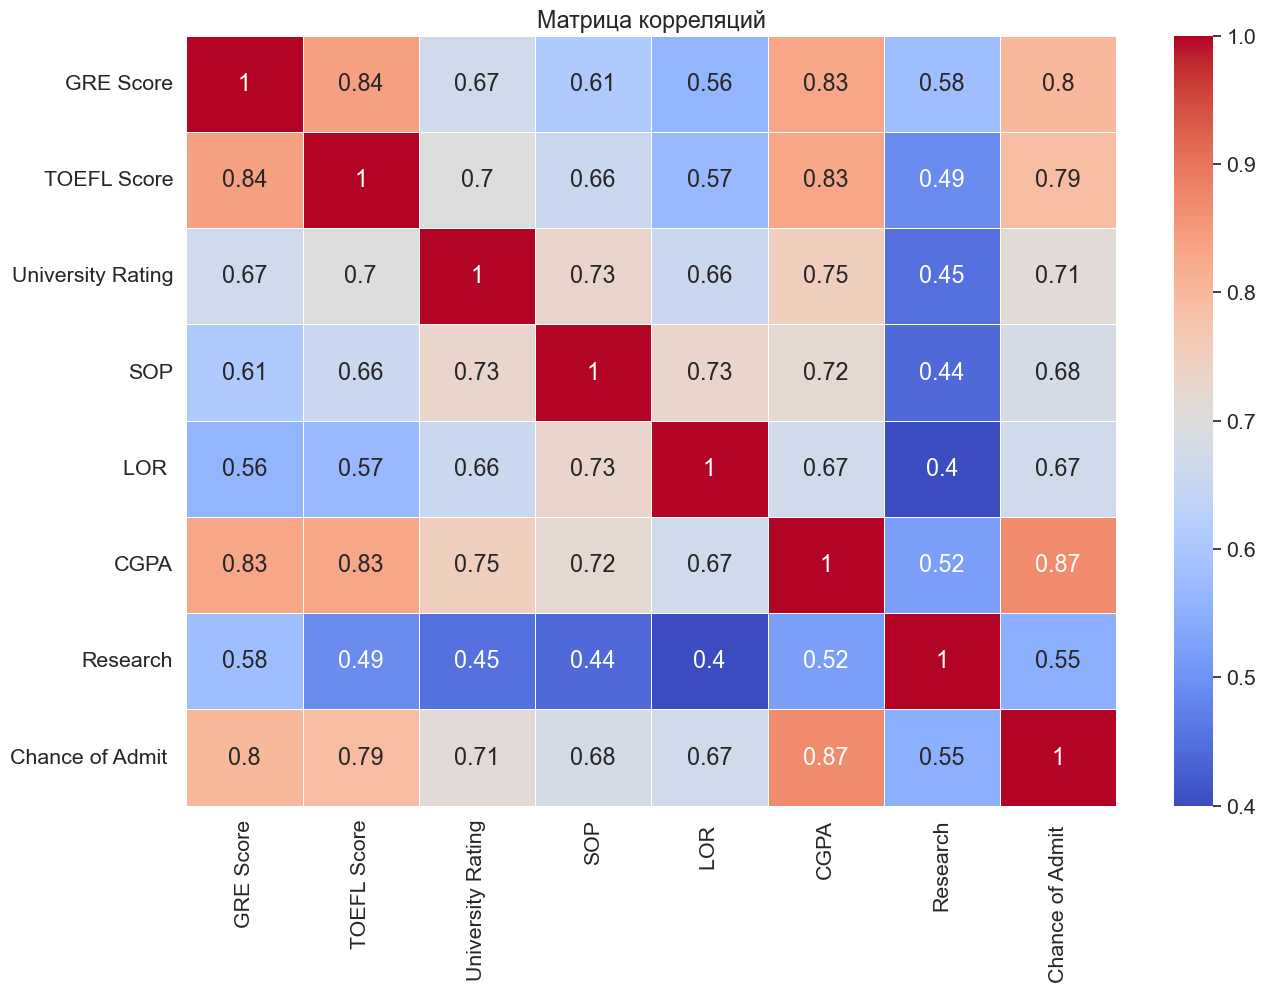

In [71]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1.4)
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')
plt.title('Матрица корреляций')

Видна сильная линейная зависимость целевого признака от признаков `GRE Score`, `TOEFL Score`, `CGPA`

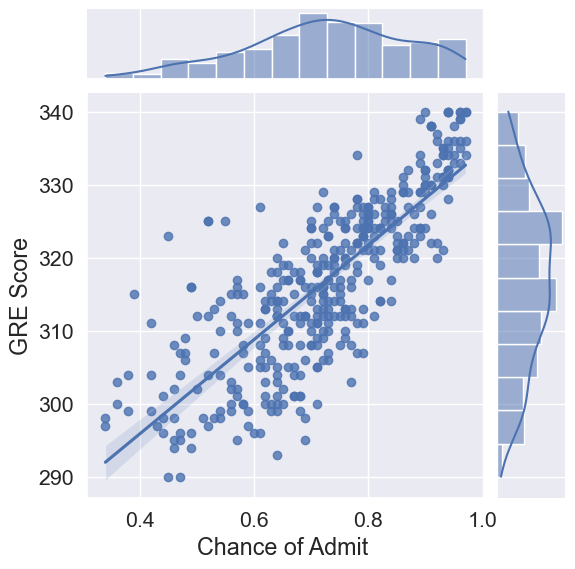

In [62]:
sns.jointplot(data = df, x='Chance of Admit ', y='GRE Score', kind='reg');

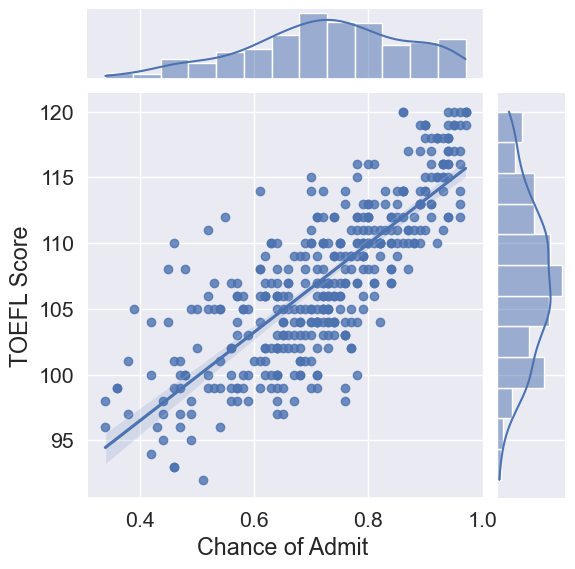

In [63]:
sns.jointplot(data = df, x='Chance of Admit ', y='TOEFL Score', kind='reg');

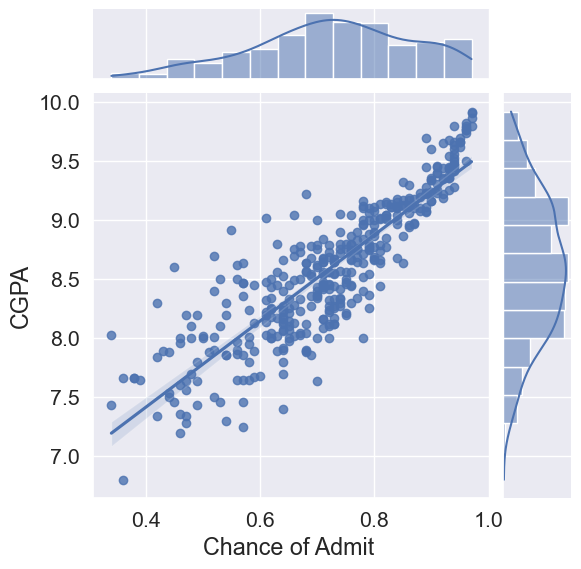

In [64]:
sns.jointplot(data = df, x='Chance of Admit ', y='CGPA', kind='reg');

### 3. Разбиение данных на обучение и тест

In [68]:
# отделяем таргет от остальных фичей
X = df.drop(columns='Chance of Admit ')
y = df['Chance of Admit ']

# разбиваем
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)
X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
157,309,104,2,2.0,2.5,8.26,0
109,304,103,5,5.0,4.0,8.64,0
17,319,106,3,4.0,3.0,8.00,1
347,299,94,1,1.0,1.0,7.34,0
24,336,119,5,4.0,3.5,9.80,1


In [72]:
len(X_train), len(X_test)

(280, 120)

### 4. Обучение модели регрессии

In [73]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [76]:
# коэффициенты ЛР и свободный вес
lr_model.coef_, lr_model.intercept_

(array([0.00183981, 0.00317072, 0.00486626, 0.00099469, 0.0136946 ,
        0.11781823, 0.01843913]),
 -1.2841780563001732)

### 5. Оценка подходящих метрик качества

In [92]:
def evaluate_preds(true_values, pred_values, title=None):
    """Оценка качества модели и график preds vs true"""

    # считаем метрики
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "RMSE:\t" + str(round(np.sqrt(mse(true_values, pred_values)), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3))
         )
    
    # строим графики
    plt.figure(figsize=(8, 8))

    sns.scatterplot(x=pred_values, y=true_values)
    plt.plot([0.4, 1], [0.4, 1], linestyle='--', color='black')  # диагональ, где true_values = pred_values (идеальные предсказания)

    plt.xlabel('Предсказаные значения')
    plt.ylabel('Истинные значения')
    plt.title(title);


#### 5.1 На train'е

R2:	0.802
RMSE:	0.062
MSE:	0.004


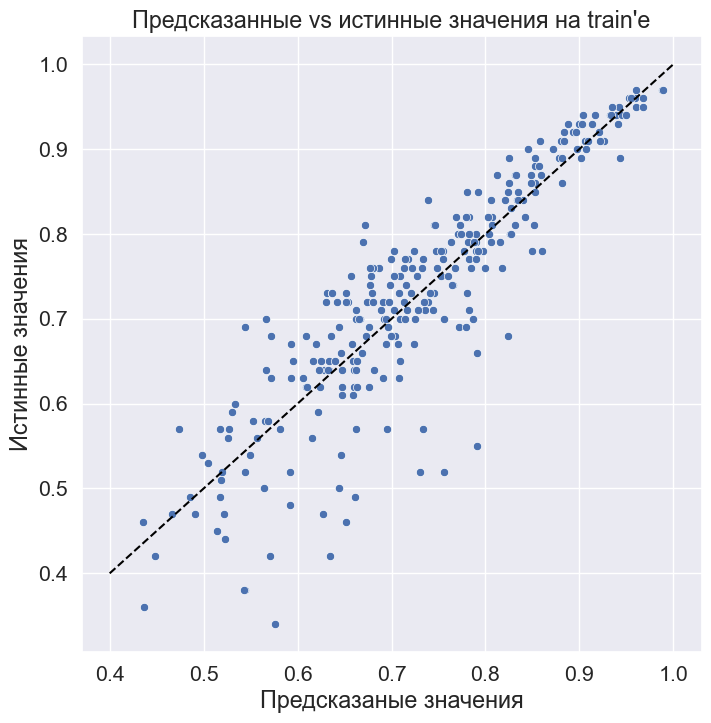

In [93]:
# делаем предсказания
y_train_preds = lr_model.predict(X_train)
evaluate_preds(y_train, y_train_preds, 'Предсказанные vs истинные значения на train\'е')

#### 5.2 На test'е

R2:	0.796
RMSE:	0.068
MSE:	0.005


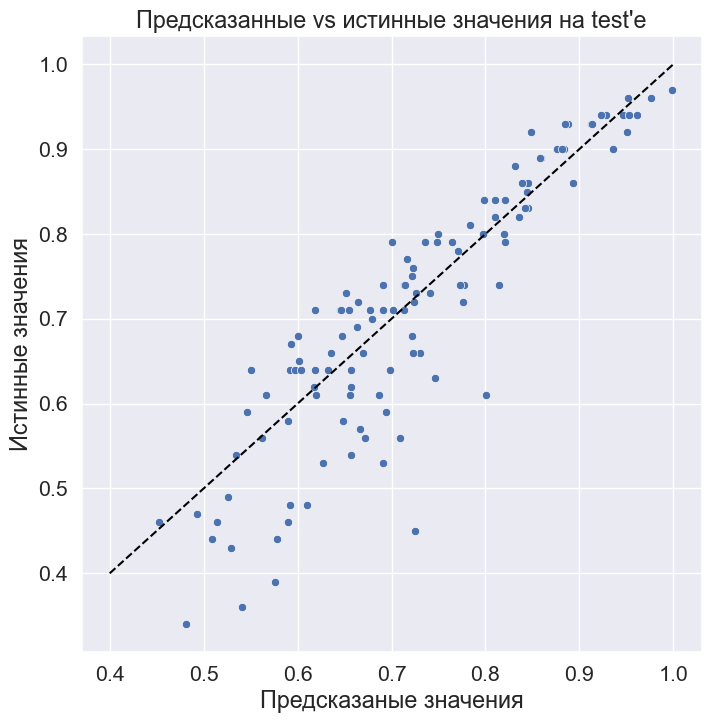

In [94]:
# делаем предсказания
y_test_preds = lr_model.predict(X_test)
evaluate_preds(y_test, y_test_preds, 'Предсказанные vs истинные значения на test\'е')

### 6. Выводы о работе

Модель обучилась достаточно хорошо как на тренировочных данных ($R^2$-метрика равна 0.802), так и на тестовых ($R^2$-метрика равна 0.796). Это стало возможным благодаря тому, что целевой признак имеет достаточно сильную (> 0.5) линейную зависимость от всех остальных.